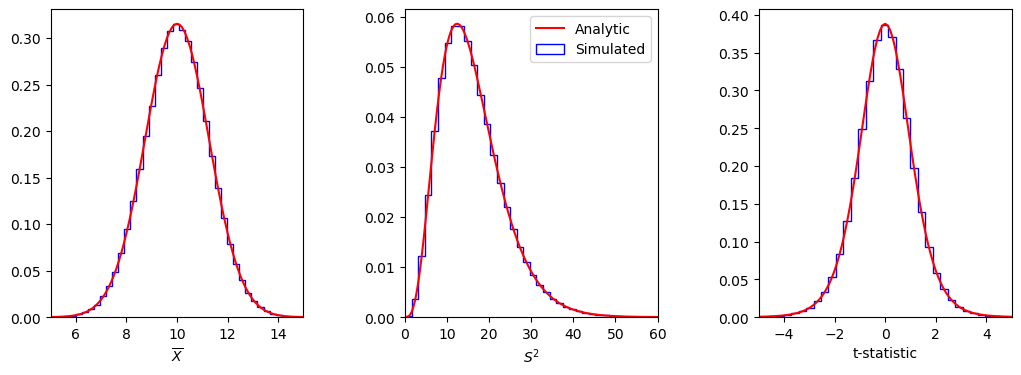

PyObject Text(0.5, 28.6, 't-statistic')

In [7]:
using Distributions, PyPlot


mu, sigma = 10, 4
n, N = 10, 10^6
sMeans = Array{Float64}(undef, N)
sVars = Array{Float64}(undef, N)
tStats = Array{Float64}(undef, N)


for i in 1:N
    data = rand(Normal(mu,sigma),n)
    sampleMean = mean(data)
    sampleVars = var(data)
    sMeans[i] = sampleMean
    sVars[i] = sampleVars
    tStats[i] = (sampleMean - mu)/(sqrt(sampleVars/n))
end

xRangeMean = 5:0.1:15
xRangeVar = 0:0.1:60
xRangeTStat = -5:0.1:5

figure(figsize=(12.4,4))
subplots_adjust(wspace=0.4)

# plt[:hist] is deprecated
# instead, use plt.hist

# pdf() is deprecated
# instead, use pdf.()

subplot(131)
#plt[:hist](sMeans,50, histtype="step", color="b", normed = true)
plt.hist(sMeans,50, histtype="step", color="b", normed = true)
#plot(xRangeMean, pdf(Normal(mu,sigma/sqrt(n)),xRangeMean), "-r")
plot(xRangeMean, pdf.(Normal(mu,sigma/sqrt(n)),xRangeMean), "-r")
xlim(5,15)
xlabel(L"$\overline{X}$")

subplot(132)
#plt[:hist](sVars,50, histtype="step", color="b", label="Simulated",normed=true);
plt.hist(sVars,50, histtype="step", color="b", label="Simulated",
normed=true);
#plot(xRangeVar, (n-1)/sigma^2*pdf(Chisq(n-1), xRangeVar * (n-1)/sigma^2),"-r", label="Analytic")
plot(xRangeVar, (n-1)/sigma^2*pdf.(Chisq(n-1), xRangeVar * (n-1)/sigma^2),"-r", label="Analytic")

# alternative for subplot(132)
#subplot(132)
#plt.hist(sVars*(n-1)/sigma^2,50, histtype="step", color="b", label="Simulated",normed=true);
#plot(xRangeVar, pdf.(Chisq(n-1), xRangeVar),"-r", label="Analytic")


xlim(5,15)
xlim(0,60)
xlabel(L"$S^2$")
legend(loc="upper right")

subplot(133)
#plt[:hist](tStats,80, histtype="step", color="b", normed=true);
plt.hist(tStats,80, histtype="step", color="b", normed=true);
#plot(xRangeTStat, pdf(TDist(n-1), xRangeTStat), "-r",)
plot(xRangeTStat, pdf.(TDist(n-1), xRangeTStat), "-r",)
xlim(5,15)
xlim(-5,5)
xlabel("t-statistic")
